
Выполнение первого задания:

Amount of NAs:  0
Amount of Duplicates:  0

Первые 5 строк датасета:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0
1  15810944       0   35            20000          0
2  15668575       1   26            43000          0
3  15603246       1   27            57000          0
4  15804002       0   19            76000          0


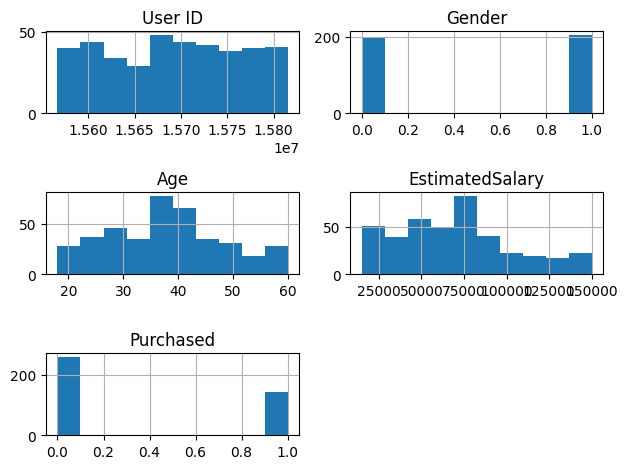


Выполнение второго задания:
Кол-во людей мужского пола(0 и женского(1):
0    257
1    143
Name: Purchased, dtype: int64

Выполнение третьего задания:
Размерность набора данных x_train:  (280, 4) 
Размерность набора данных x_test:  (120, 4) 
Размерность набора данных y_train:  (280,) 
Размерность набора данных y_test:  (120,)

Выполнение четвертого и пятого заданий:
Применение метода логистической регрессии:


Выполнение метода логистической регрессии:

Time used:  0.012928485870361328
Предсказанные значения:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0]
Исходные данные:  [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 

              precision    recall  f1-score   support

           0       0.72      0.99      0.83        70
           1       0.96      0.46      0.62        50

    accuracy                           0.77       120
   macro avg       0.84      0.72      0.73       120
weighted avg       0.82      0.77      0.74       120

Test accuracy: 0.7666666666666667

Применение метода SVM (метод опорных векторов):

Время выполнения SVM: 0.009 сек
Коэффициент точности (accuracy score): 73 %
Числовое представление матрицы ошибок:
 [[70  0]
 [32 18]]


              precision    recall  f1-score   support

           0       1.00      0.69      0.81       102
           1       0.36      1.00      0.53        18

    accuracy                           0.73       120
   macro avg       0.68      0.84      0.67       120
weighted avg       0.90      0.73      0.77       120


Применение метода KNN (кол-во ближайших соседей):

Время выполнения KNN: 0.01 сек
Коэффициент точности (accuracy score): 72 %
Числовое представление матрицы ошибок:
 [[69  1]
 [33 17]]


              precision    recall  f1-score   support

           0       0.99      0.68      0.80       102
           1       0.34      0.94      0.50        18

    accuracy                           0.72       120
   macro avg       0.66      0.81      0.65       120
weighted avg       0.89      0.72      0.76       120



In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

# Датасет для работы в практической работе
# предобработка не требуется - дубликатов нет изначально
data = pandas.read_csv('AntiSocialClub.csv', sep=',')
data['Gender'].replace('Male',0,inplace=True)
data['Gender'].replace('Female',1,inplace=True)


def task1():
    print('\nВыполнение первого задания:\n')
    print('Amount of NAs: ',data.isna().sum().sum())
    print('Amount of Duplicates: ',data.duplicated().sum())

    print('\nПервые 5 строк датасета:\n', data.head())


def task2():
    data.hist()
    plt.tight_layout()
    plt.show()
    print('\nВыполнение второго задания:\n'
          'Кол-во людей мужского пола(0 и женского(1):\n',
          data["Purchased"].value_counts(), sep='')


# Разбиение выборки на тренировочную и тестовую для 3-5 заданий
x = data.drop(["Purchased"], axis=1)
y = data["Purchased"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=88)


def task3():
    print('\nВыполнение третьего задания:\n'
          'Размерность набора данных x_train: ', x_train.shape,
          '\nРазмерность набора данных x_test: ', x_test.shape,
          '\nРазмерность набора данных y_train: ', y_train.shape,
          '\nРазмерность набора данных y_test: ', y_test.shape)


# Вспомогательная функция построения графической матрицы ошибок
def plot_confusion_matrix(data_confusion, title='Матрица ошибок', cmap=plt.cm.bone):
    plt.matshow(data_confusion, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data_confusion.columns))
    plt.xticks(tick_marks, data_confusion.columns)
    plt.yticks(tick_marks, data_confusion.index)
    plt.xlabel(data_confusion.columns.name)
    plt.ylabel(data_confusion.index.name)
    plt.show()


def task4and5():
    print('\nВыполнение четвертого и пятого заданий:\n'
          'Применение метода логистической регрессии:\n')
    start = time.perf_counter()

    # Вычисление логистической регрессии
    print('\nВыполнение метода логистической регрессии:\n')
    start = time.perf_counter()
    time_start = time.time()
    model = LogisticRegression(random_state=123,max_iter=1000)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print("Time used: ", time.time() - time_start)
    print('Предсказанные значения: ', y_predict)
    print('Исходные данные: ', np.array(y_test))
    print('%\nЧисловое представление матрицы ошибок:\n',confusion_matrix(y_test, y_predict))

    fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
    fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
    fig.show()
    print(classification_report(y_test, y_predict))
    print("Test accuracy: {}".format(model.score(x_test,y_test)))


    print('\nПрименение метода SVM (метод опорных векторов):\n')
    start = time.perf_counter()

    # Применение метода SVM
    model = svm.SVC(kernel='linear', C=1.0)
    model.fit(x_train, y_train)
    svm_predict = model.predict(x_test)


    elapsed = time.perf_counter() - start

    print('Время выполнения SVM:', round(elapsed, 3),
          'сек\nКоэффициент точности (accuracy score):',
          round(accuracy_score(y_test, svm_predict) * 100),
          '%\nЧисловое представление матрицы ошибок:\n',
          confusion_matrix(y_test, svm_predict))

    data_confusion = pandas.crosstab(y_test, svm_predict)
    fig = px.imshow(confusion_matrix(y_test, svm_predict), text_auto=True)
    fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
    fig.show()
    print(classification_report(svm_predict, y_test))

    print('\nПрименение метода KNN (кол-во ближайших соседей):\n')
    start = time.perf_counter()

    knn_model = KNeighborsClassifier(n_neighbors=25)
    knn_model.fit(x_train, y_train)
    knn_predict = knn_model.predict(x_test)


    elapsed = time.perf_counter() - start

    print('Время выполнения KNN:', round(elapsed, 3),
          'сек\nКоэффициент точности (accuracy score):',
          round(accuracy_score(y_test, knn_predict) * 100),
          '%\nЧисловое представление матрицы ошибок:\n',
          confusion_matrix(y_test, knn_predict))

    data_confusion = pandas.crosstab(y_test, knn_predict)
    fig = px.imshow(confusion_matrix(y_test, knn_predict), text_auto=True)
    fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
    fig.show()
    print(classification_report(knn_predict, y_test))


task1()
task2()
task3()
task4and5()
